In [31]:
from ultralytics import YOLO
import os
import yaml
from IPython.display import Image
import json
import cv2

In [2]:
project_dir = os.path.dirname(os.getcwd())
dataset_location = os.path.join(project_dir, 'data', 'roboflow_dataset_yolo_v11')
data_yaml_location = os.path.join(dataset_location, 'data.yaml')

In [3]:
with open (data_yaml_location, 'r') as file:
    data = yaml.safe_load(file)

data['train'] = f'{dataset_location}/train/images'
data['val'] = f'{dataset_location}/valid/images'
data['test'] = f'{dataset_location}/test/images'

with open(data_yaml_location, 'w') as file:
    yaml.dump(data, file)

In [4]:
# Load a pretrained YOLO detection model
model = YOLO('yolo11s.pt')

# Set the logging directory
log_dir = f'{dataset_location}/logs'  # specify your directory here

# Train the model and log results to the specified directory
model.train(
    data=data_yaml_location,
    epochs=3,
    project=log_dir,  # directory to save results
    name='experiment1'  # subdirectory for this specific run
)

New https://pypi.org/project/ultralytics/8.3.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.18 🚀 Python-3.12.7 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs, name=experiment1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=

train: Scanning /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/train/labels.cache... 18528 images, 18 backgrounds, 0 corrupt: 100%|██████████| 18528/18528 [00:00<?, ?it/s]
val: Scanning /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/valid/labels.cache... 1765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1765/1765 [00:00<?, ?it/s]


Plotting labels to /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.22G      1.259      1.126      1.218         22        640: 100%|██████████| 1158/1158 [04:37<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:11<00:00,  4.79it/s]

                   all       1765       1840      0.884      0.891      0.906      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      4.31G      1.206     0.6536      1.186         26        640: 100%|██████████| 1158/1158 [04:44<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:12<00:00,  4.55it/s]

                   all       1765       1840      0.972       0.92      0.957      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.29G      1.149     0.5694      1.151         27        640: 100%|██████████| 1158/1158 [04:40<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:12<00:00,  4.57it/s]

                   all       1765       1840      0.976      0.941      0.975      0.674



3 epochs completed in 0.245 hours.
Optimizer stripped from /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1/weights/last.pt, 19.2MB
Optimizer stripped from /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1/weights/best.pt, 19.2MB

Validating /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.12.7 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:13<00:00,  4.28it/s]


                   all       1765       1840      0.976      0.941      0.975      0.674
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e46e070e6c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

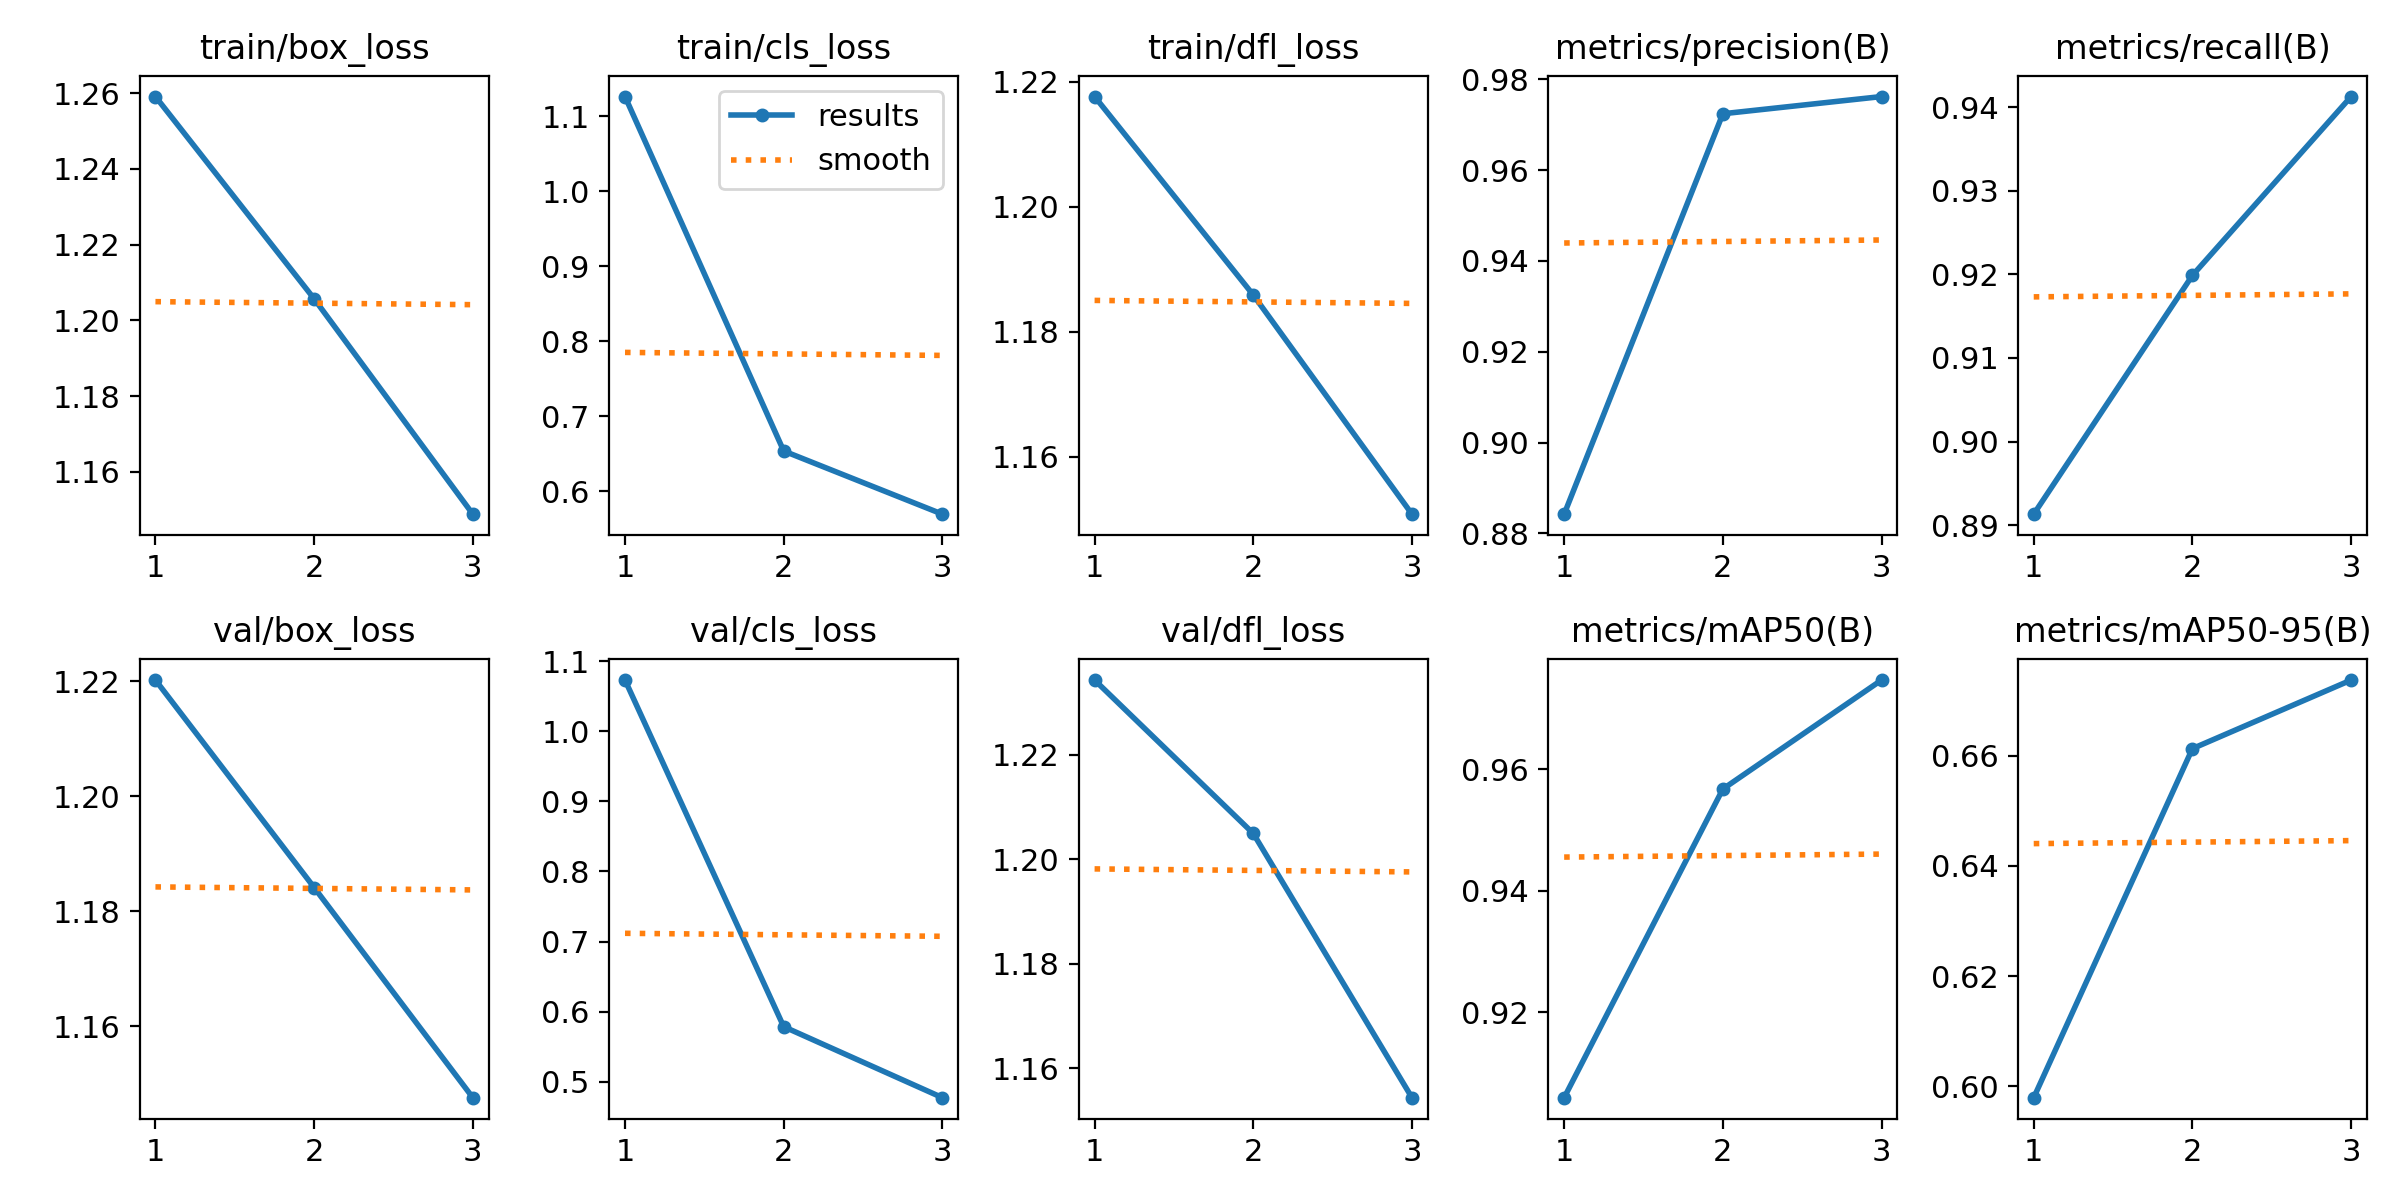

In [7]:
Image(filename=f'{log_dir}/experiment1/results.png', width=1000)  # view results.png

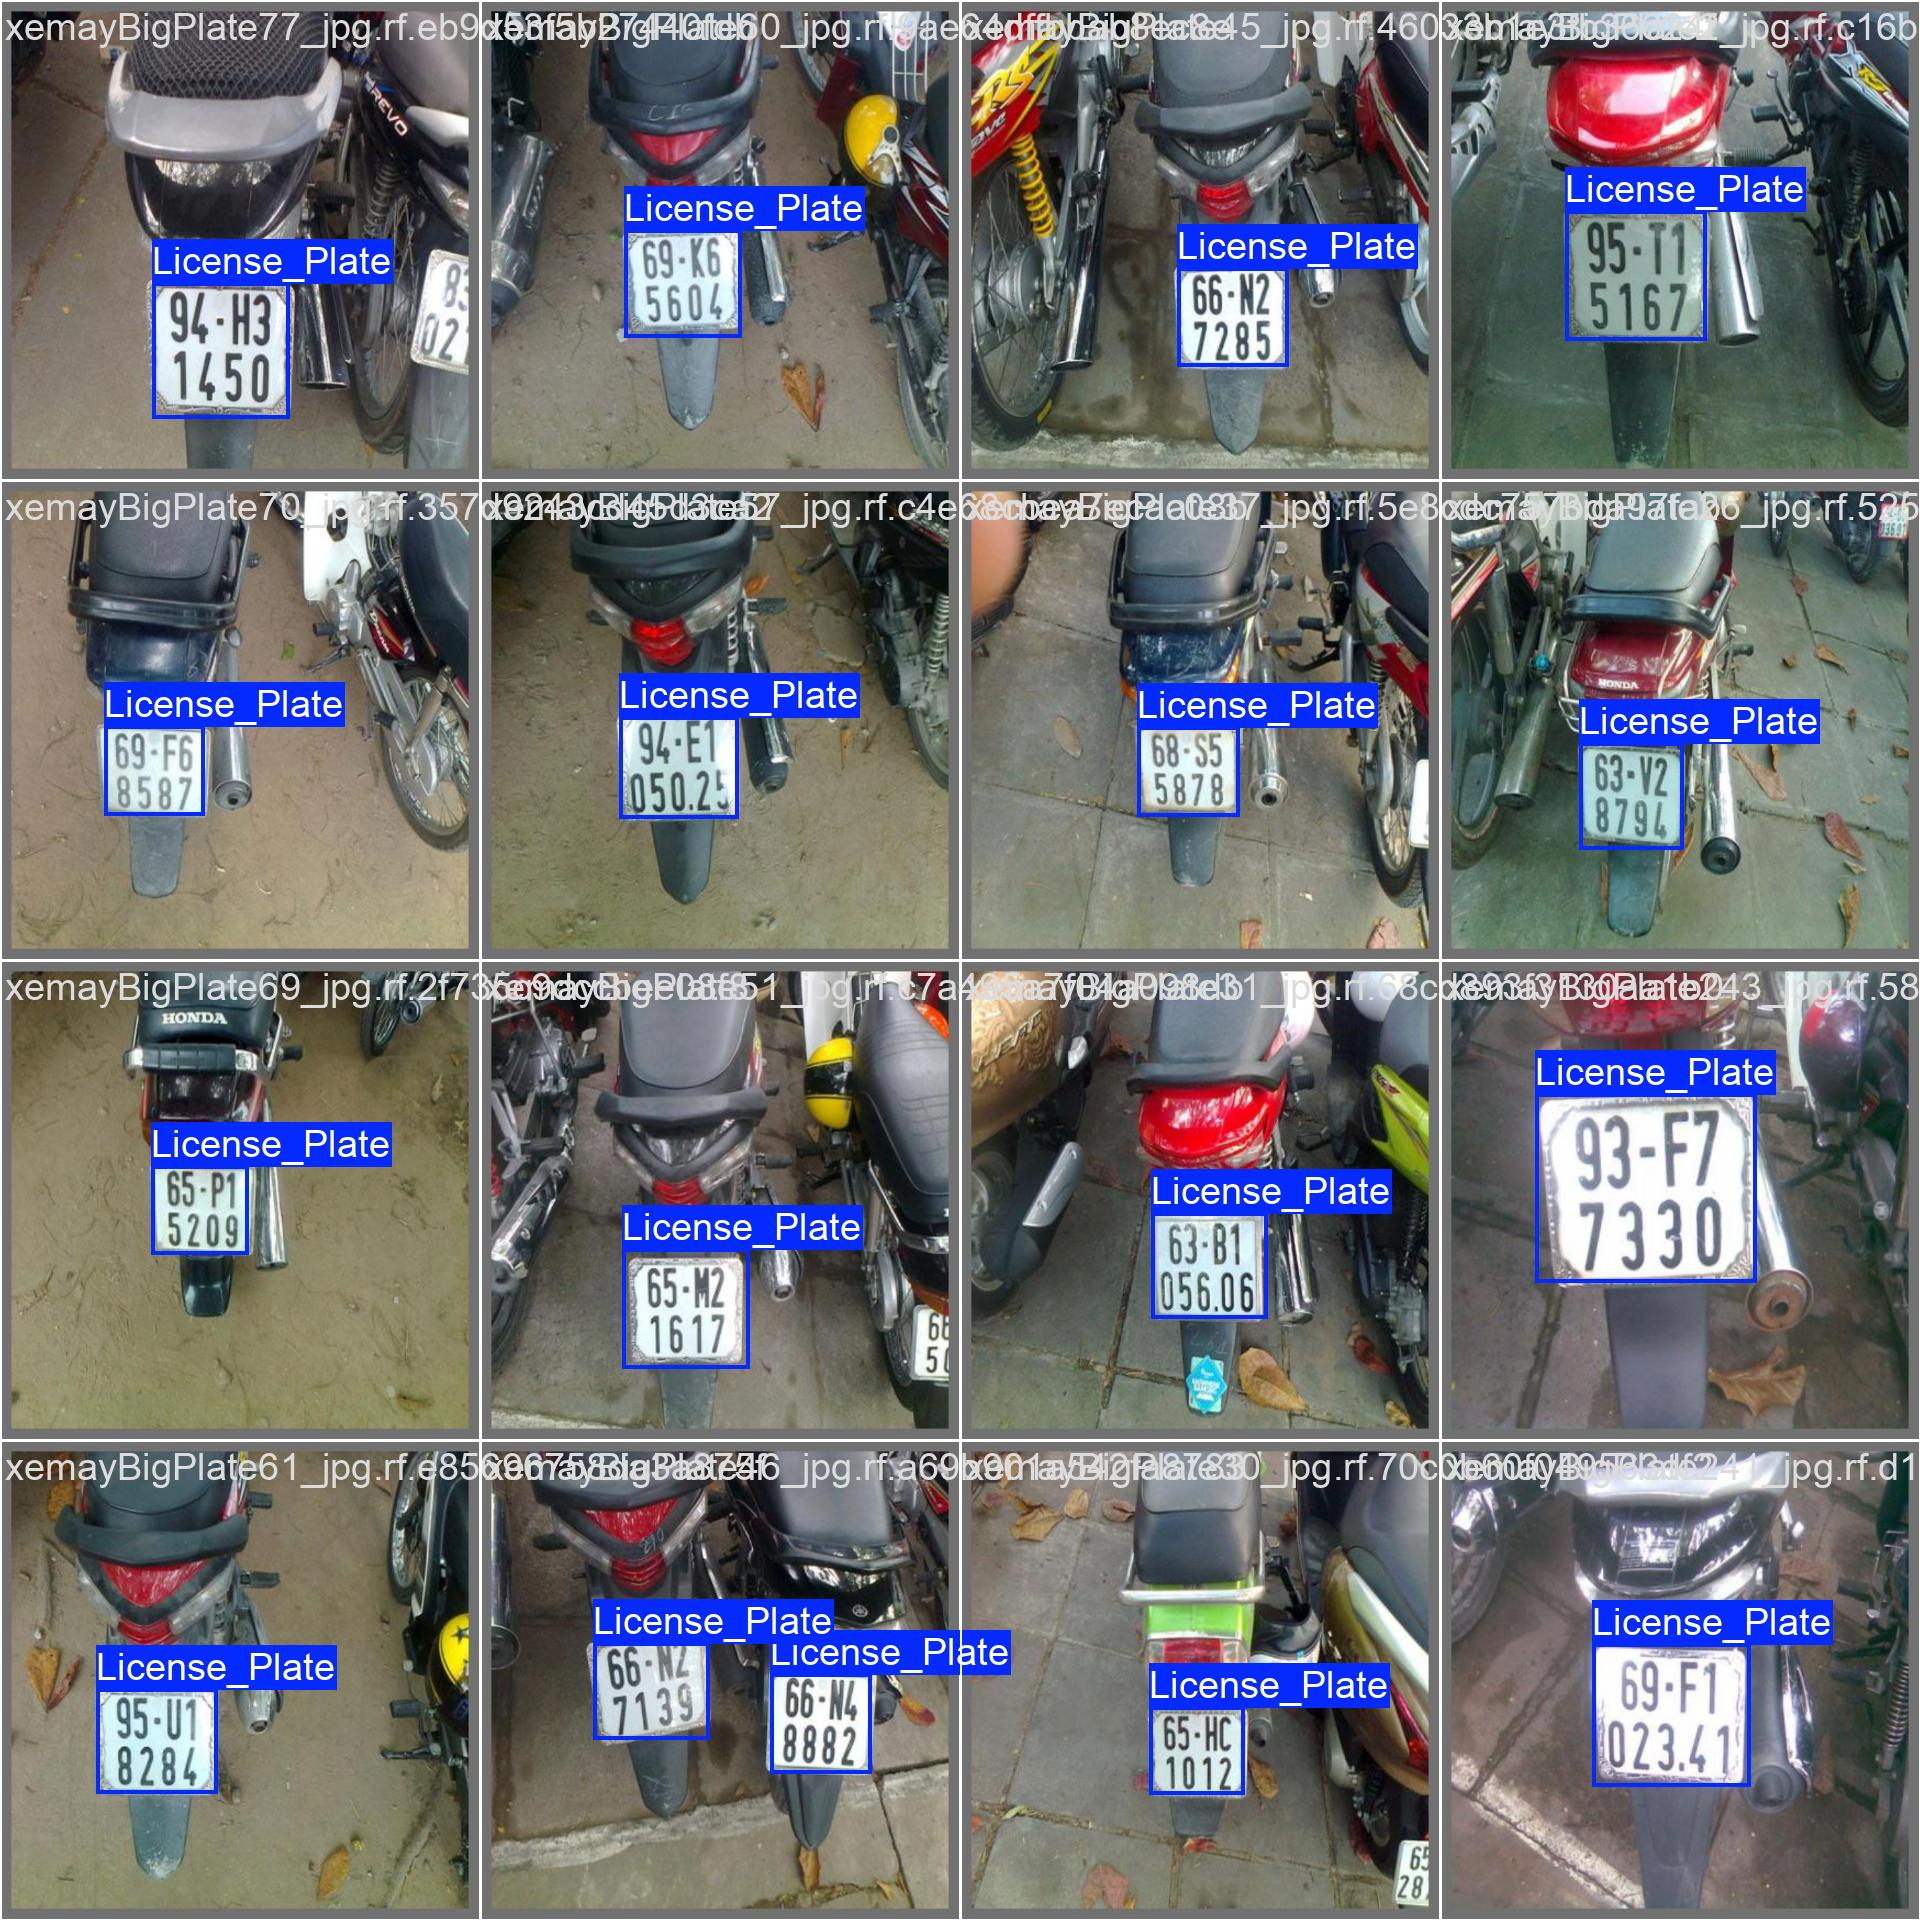

In [8]:
Image(filename=f'{log_dir}/experiment1/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


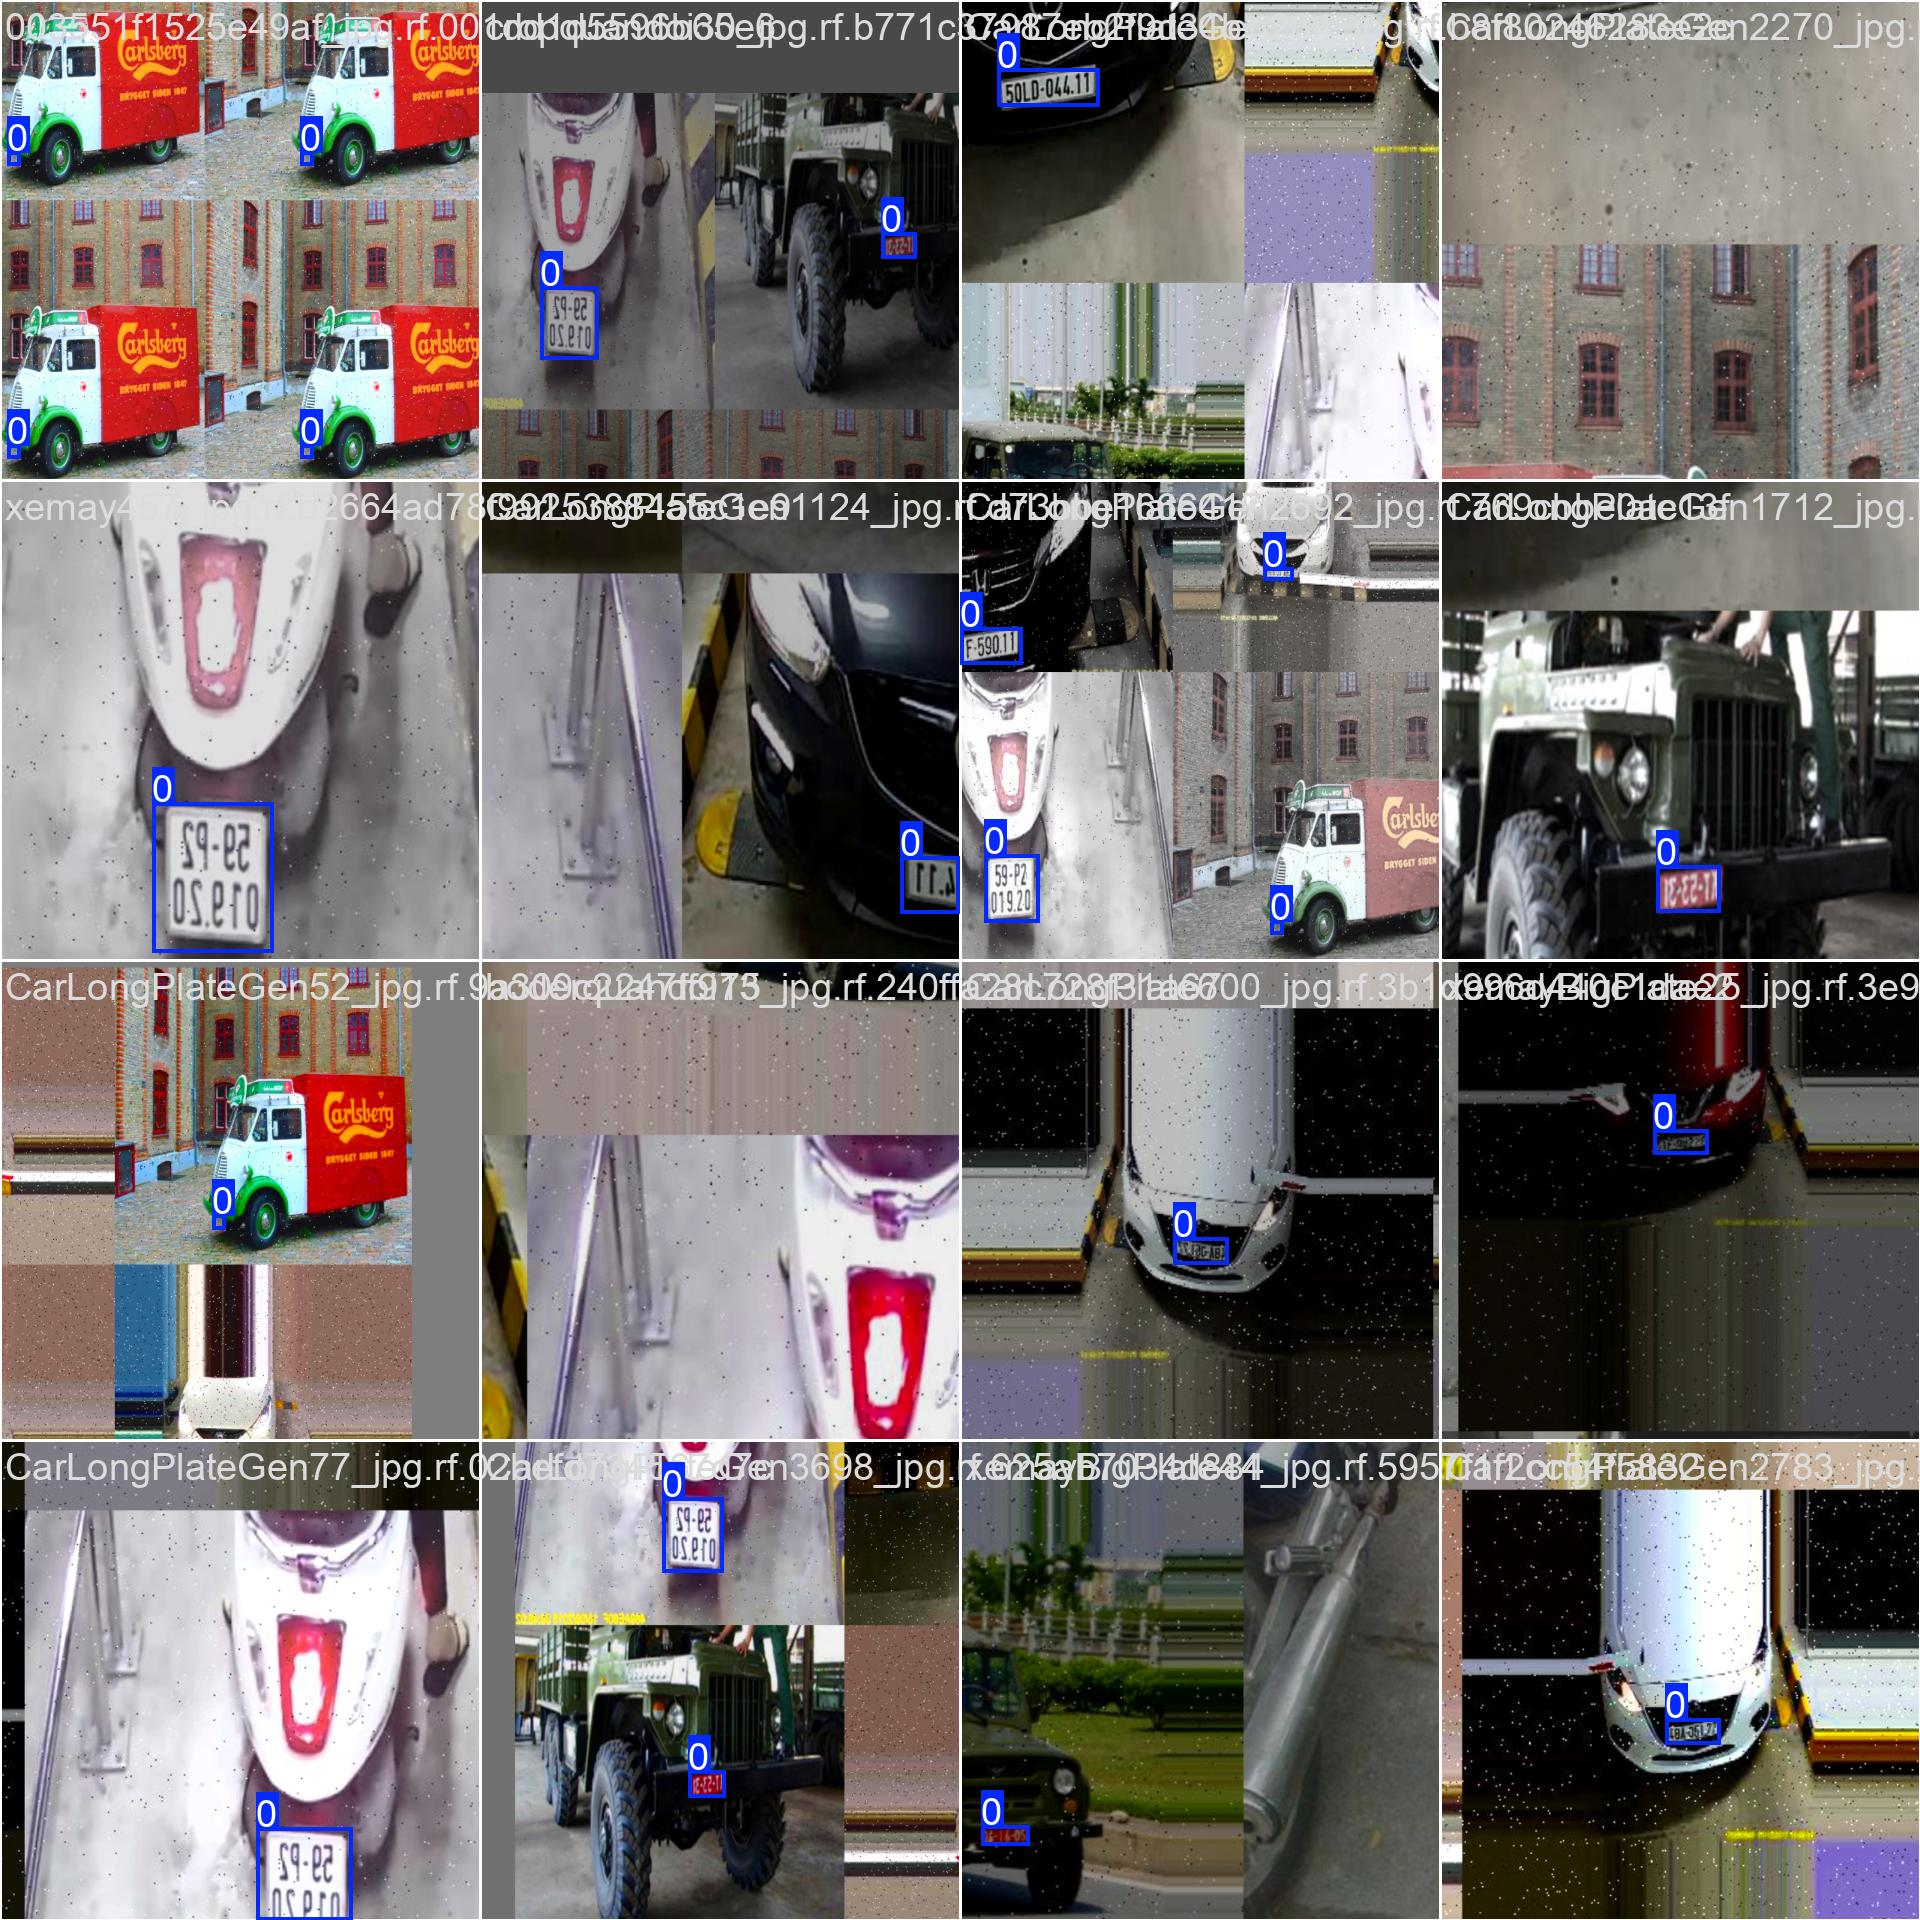

In [9]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename=f'{log_dir}/experiment1/train_batch0.jpg', width=900)

In [36]:
from pathlib import Path

# Specify the directory containing images to detect objects on
images_dir = f'{dataset_location}/test/images'  # replace with the path to your dataset
output_log_dir = f'{dataset_location}/detection_results/labels'  # directory to save detection info
output_img_dir = f'{dataset_location}/detection_results'
cropped_plates_path = f'{dataset_location}/cropped_plates'

Path(output_log_dir).mkdir(parents=True, exist_ok=True)
Path(output_img_dir).mkdir(parents=True, exist_ok=True)
Path(cropped_plates_path).mkdir(parents=True, exist_ok=True)

# Run inference and save details
for image_path in Path(images_dir).glob("*.jpg"):  # replace with the appropriate extension if different
    # Perform detection
    results = model(image_path)
    
    # Prepare to save results
    detections = []
    # Process results list
    # for result in results:
    #     boxes = result.boxes  # Boxes object for bounding box outputs
    #     masks = result.masks  # Masks object for segmentation masks outputs
    #     keypoints = result.keypoints  # Keypoints object for pose outputs
    #     probs = result.probs  # Probs object for classification outputs
    #     obb = result.obb  # Oriented boxes object for OBB outputs
    #     result.show()  # display to screen
    #     result.save(filename="result.jpg")  # save to disk
    max_conf = -1.0
    for det in results[0].boxes.data:  # detections for the image
        conf = float(det[4])
        if conf < max_conf:
            continue
        x1, y1, x2, y2, conf, cls = map(float, det[:6])
        # class_name = model.names[int(cls)]
        detections.append({
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
            "confidence": conf,
            "class": int(cls)
        })

    img = cv2.imread(image_path)
    cropped_plate = img[int(y1):int(y2), int(x1):int(x2)]
    plate_save_path = os.path.join(cropped_plates_path, f'plate_{image_path.stem}.jpg')
    cv2.imwrite(plate_save_path, cropped_plate)

    results[0].save(filename=f'{output_img_dir}/{image_path.stem}.jpg')
    
    # Save detections to a JSON file
    output_file = Path(output_log_dir) / f"{image_path.stem}_detections.json"
    with open(output_file, 'w') as f:
        json.dump(detections, f, indent=4)



image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemayBigPlate29_jpg.rf.9e5cd3a5b39230305d00f718464e92ef.jpg: 640x640 1 License_Plate, 8.0ms
Speed: 13.5ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemayBigPlate137_jpg.rf.a1c6d20f41859fcd7d5ae61987b24f80.jpg: 640x640 1 License_Plate, 7.2ms
Speed: 3.9ms preprocess, 7.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/CarLongPlateGen944_jpg.rf.af49e422f92a7bb992158e1989f2a28b.jpg: 640x640 1 License_Plate, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemay2204